# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

<Axes: xlabel='APGAR5_CAT', ylabel='count'>

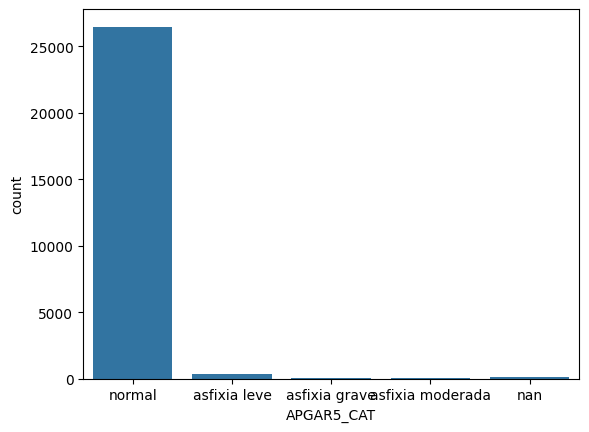

In [16]:
sinasc.loc[sinasc['APGAR5'] <= 3, 'APGAR5_CAT'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5), 'APGAR5_CAT'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7), 'APGAR5_CAT'] = 'asfixia leve'
sinasc.loc[sinasc['APGAR5'] >= 8, 'APGAR5_CAT'] = 'normal'

sns.countplot(x='APGAR5_CAT', data=sinasc)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

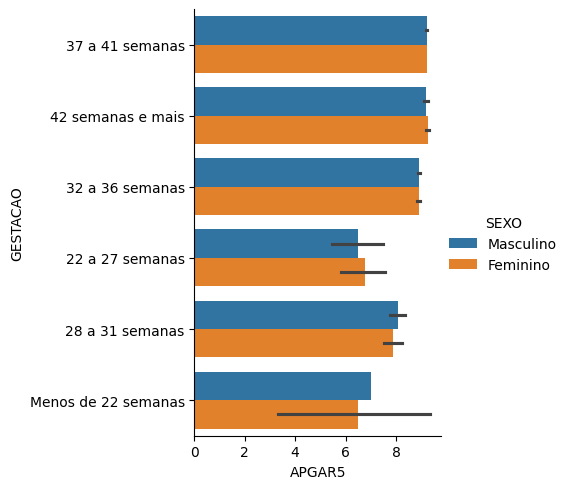

In [34]:
sns.catplot(x='APGAR5',y = 'GESTACAO'
            , hue = 'SEXO'
            , kind='bar'
            , data=sinasc
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [35]:
freq = pd.crosstab(sinasc['APGAR5'], sinasc['GESTACAO'])
freq

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,7,0,2,5,1,1
1.0,0,0,2,20,0,0
2.0,8,2,2,3,0,1
3.0,6,1,2,5,0,0
4.0,1,5,8,7,0,0
5.0,0,7,11,21,1,0
6.0,2,7,17,45,1,0
7.0,10,11,56,151,5,1
8.0,24,61,362,1417,44,0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [39]:
freq_div = freq.div(freq.sum(axis=1), axis=0)
freq_div

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,0.437500,0.000000,0.125000,0.312500,0.062500,0.062500
1.0,0.000000,0.000000,0.090909,0.909091,0.000000,0.000000
2.0,0.500000,0.125000,0.125000,0.187500,0.000000,0.062500
3.0,0.428571,0.071429,0.142857,0.357143,0.000000,0.000000
4.0,0.047619,0.238095,0.380952,0.333333,0.000000,0.000000
5.0,0.000000,0.175000,0.275000,0.525000,0.025000,0.000000
6.0,0.027778,0.097222,0.236111,0.625000,0.013889,0.000000
7.0,0.042735,0.047009,0.239316,0.645299,0.021368,0.004274
8.0,0.012579,0.031971,0.189727,0.742662,0.023061,0.000000


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='APGAR5'>

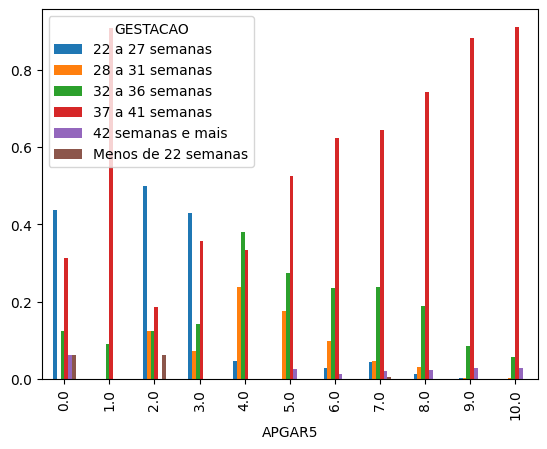

In [49]:
freq_div.loc[freq_div.index < 37].plot(kind='bar')

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='PESO', ylabel='APGAR5'>

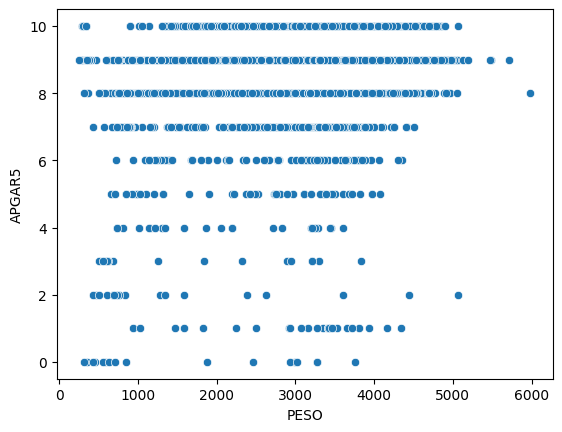

In [66]:
sns.scatterplot(x='PESO', y='APGAR5', data=sinasc)